## 0b) Creating the file structure

In [19]:
import os

current_dir = os.path.abspath("")

print(f"{current_dir}")

current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files}")

first_folder = ["experiment_small_data", "experiment_tiny_data"]
second_folder = ["train", "test", "val"]

for a in range(len(first_folder)):
        try:
            os.mkdir(f"{first_folder[a]}")
        except FileExistsError as err:
            print(err)
        for b in range(len(second_folder)):
            try:
                os.mkdir(f"{first_folder[a]}/{second_folder[b]}")
            except FileExistsError as err:
                print(err)

c:\Users\fredr\OneDrive\Documents\GitHub\Deep_Learning_FH\Labb1
['experiment_small_data', 'experiment_tiny_data', 'lab.ipynb', 'originaldata']
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/val'


## 0b) Plotting 10 random cat images

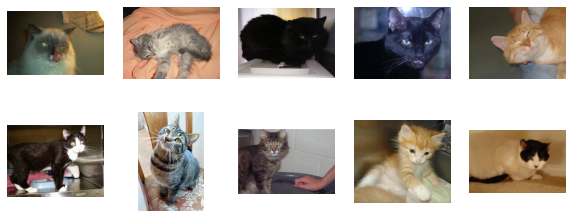

In [20]:
import matplotlib.pyplot as plt
import random as rnd

ten_rand_image = []
for i in range(10):
    r = rnd.randint(1,500)
    ten_rand_image.append(plt.imread(f"./originaldata/train/train/cat.{r}.jpg"))


fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ten_rand_image[i], cmap = "gray")
    ax.axis("off")


## 0d) Train / Val / Test / Split

In [21]:
import shutil

r = rnd.sample(range(12499), 1250) # This random-list is created without duplicates, so no duplicates of pictures.
train_path = r"./experiment_small_data/train"
test_path = r"./experiment_small_data/test"
val_path = r"./experiment_small_data/val"
for i in range(1250):
        train_cat = f"./originaldata/train/train/cat.{r[i]}.jpg"
        train_dog = f"./originaldata/train/train/dog.{r[i]}.jpg"
        if i <= 800:
                end_path = train_path
        elif i <= 1000:
                end_path = val_path
        else:
                end_path = test_path
        shutil.copy(train_cat, end_path)
        shutil.copy(train_dog, end_path)

## 0e) One-hot-encoding

In [56]:
import numpy as np
temporary_train = np.array(os.listdir("./experiment_small_data/train"))
temporary_test = np.array(os.listdir("./experiment_small_data/test"))
temporary_val = np.array(os.listdir("./experiment_small_data/val"))
X_train = []
y_train = []
test_list = []
val_list = []


temporary_train = np.array(os.listdir("./experiment_small_data/train"))
rnd.shuffle(temporary_train)

for i,_ in enumerate(temporary_train):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    X_train.append(plt.imread(f"./experiment_small_data/train/{temporary_train[i]}"))
    y_train.append(animal)


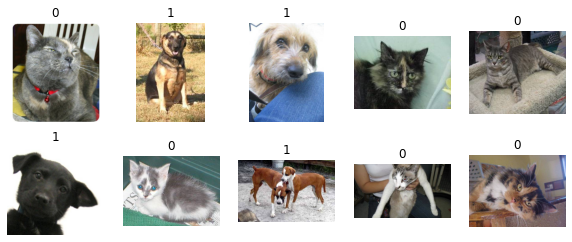

In [57]:
# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap = "gray")
    ax.axis("off")
    ax.set(title=y_train[i])


([<matplotlib.patches.Wedge at 0x2139ecf6610>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

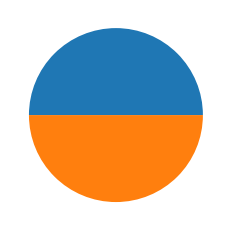

In [71]:
plt.pie([y_train.count(0),y_train.count(1)])

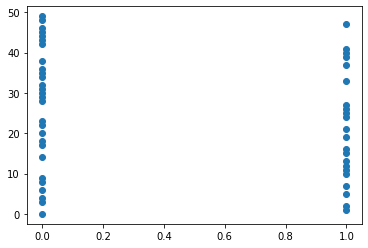

In [88]:
# plotting that they are not in a specific order, just random.
plot_list = []
x=0
for i in range(50):
    plot_list.append(x)
    x+=1
plt.scatter(x = y_train[0:50], y = test_list, )

## 1a) Plot image sizes.

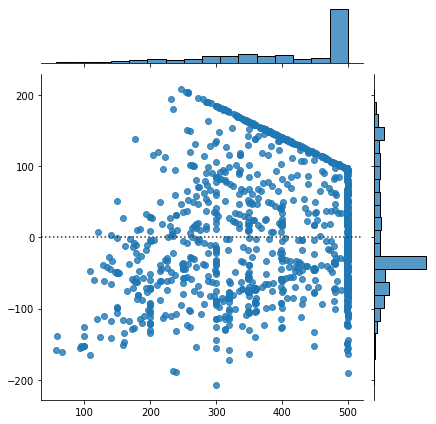

In [126]:
import seaborn as sns
import PIL

directory = './experiment_small_data/train/'
joint_x = []
joint_y = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image = PIL.Image.open(f)
        width, height = image.size
        joint_x.append(width)
        joint_y.append(height)

sns.jointplot(x = joint_x, y = joint_y, kind = "resid")